In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
import os   # r for raw data 
files = os.listdir(r"D:\Online Courses\Udemy\Data Analysis-projects\uber-pickups-in-new-york-city")[-7:]
files

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-janjune-15.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [11]:
files.remove("uber-raw-data-janjune-15.csv")
files

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [12]:
path = r"D:\Online Courses\Udemy\Data Analysis-projects\uber-pickups-in-new-york-city"

final = pd.DataFrame()
for file in files:
    df = pd.read_csv(path+"/"+file, encoding="utf-8")
    final=pd.concat([df,final])

In [15]:
df=final.copy()

In [17]:
df.head()

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [18]:
df.dtypes

Date/Time     object
Lat          float64
Lon          float64
Base          object
dtype: object

In [22]:
# change to date/time to datetime format
df["Date/Time"]=pd.to_datetime(df["Date/Time"],format="%m/%d/%Y %H:%M:%S")

In [23]:
df.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
dtype: object

In [25]:
# separate the datetime
df["Weekday"]=df["Date/Time"].dt.day_name()
df["Day"]=df["Date/Time"].dt.day
df["Month"]=df["Date/Time"].dt.month
df["Minute"]=df["Date/Time"].dt.minute
df["Hours"]=df["Date/Time"].dt.hour

In [26]:
df.head()

,Date/Time,Lat,Lon,Base,Weekday,Day,Month,Minute,Hours
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,Monday,1,9,1,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,Monday,1,9,1,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,Monday,1,9,3,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,Monday,1,9,6,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,Monday,1,9,11,0


In [27]:
df["Weekday"].value_counts()

Thursday     755145
Friday       741139
Wednesday    696488
Tuesday      663789
Saturday     646114
Monday       541472
Sunday       490180
Name: Weekday, dtype: int64

In [28]:
!pip install plotly

In [33]:
import plotly.express as px
px.bar(x=df["Weekday"].value_counts().index,
y=df["Weekday"].value_counts(),title="Weekdays travel")

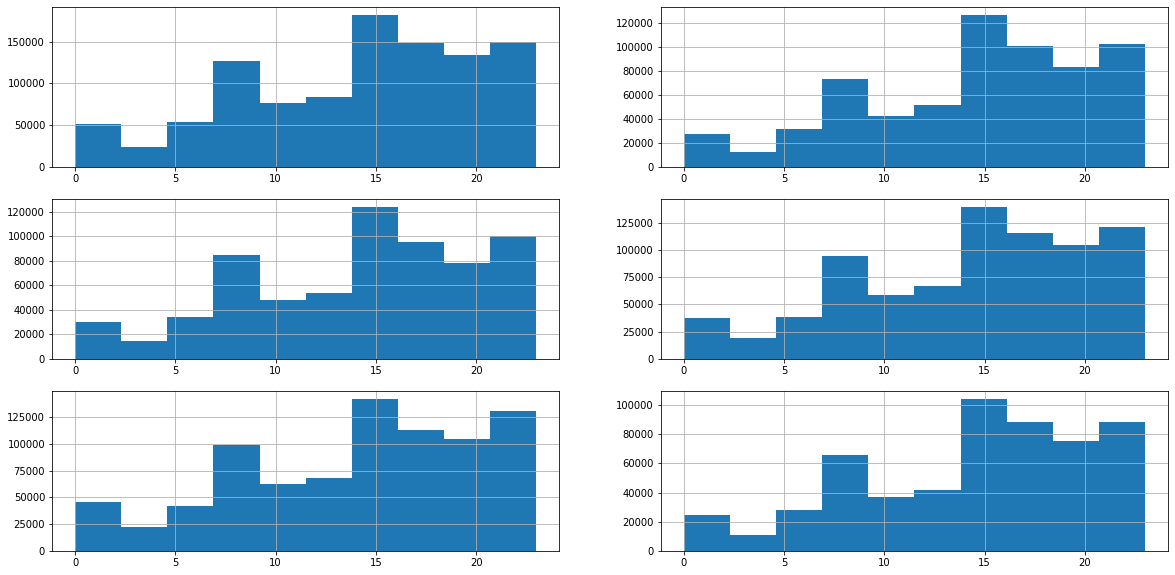

In [38]:
plt.figure(figsize=(20,10))

for i, month in enumerate(df["Month"].unique()):
    plt.subplot(3,2,i+1)
    df[df["Month"]==month]["Hours"].hist()

In [43]:
!pip install chart_studio

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11435 sha256=8ca8950fcdec89470a3acf1c34b729a8d052ba2dedfcb2fdefc3292c8659a095
  Stored in directory: c:\users\uer\appdata\local\pip\cache\wheels\f9\8d\8d\f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [44]:

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot


In [45]:
df.groupby("Month")["Hours"].count()

Month
4     564516
5     652435
6     663844
7     796121
8     829275
9    1028136
Name: Hours, dtype: int64

In [56]:
# most ride in month
trace1=go.Bar(x=df.groupby("Month")["Hours"].count().index,
            y=df.groupby("Month")["Hours"].count(),
            name="Priority"
                )

In [57]:
iplot([trace1])

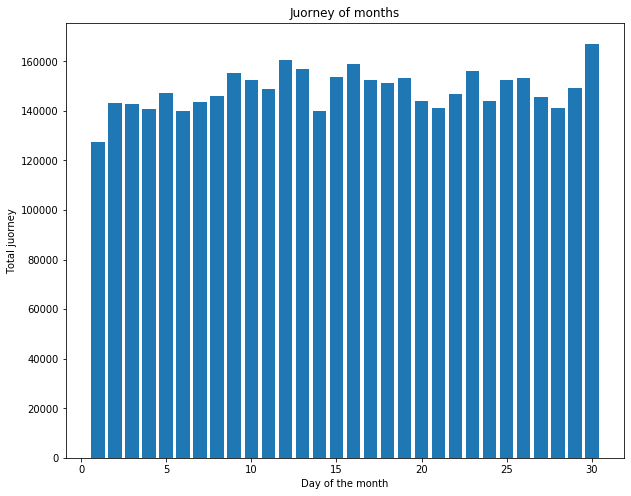

In [60]:
plt.figure(figsize=(10,8))
plt.hist(df["Day"],bins=30,rwidth=0.8,range=(0.5,30.5))
plt.xlabel("Day of the month")
plt.ylabel("Total juorney")
plt.title("Juorney of months")
plt.show()

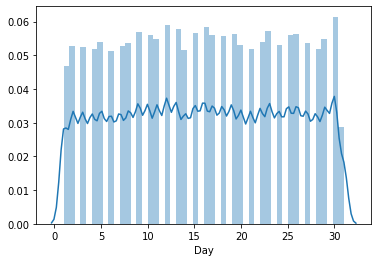

In [62]:
sns.distplot(df["Day"])

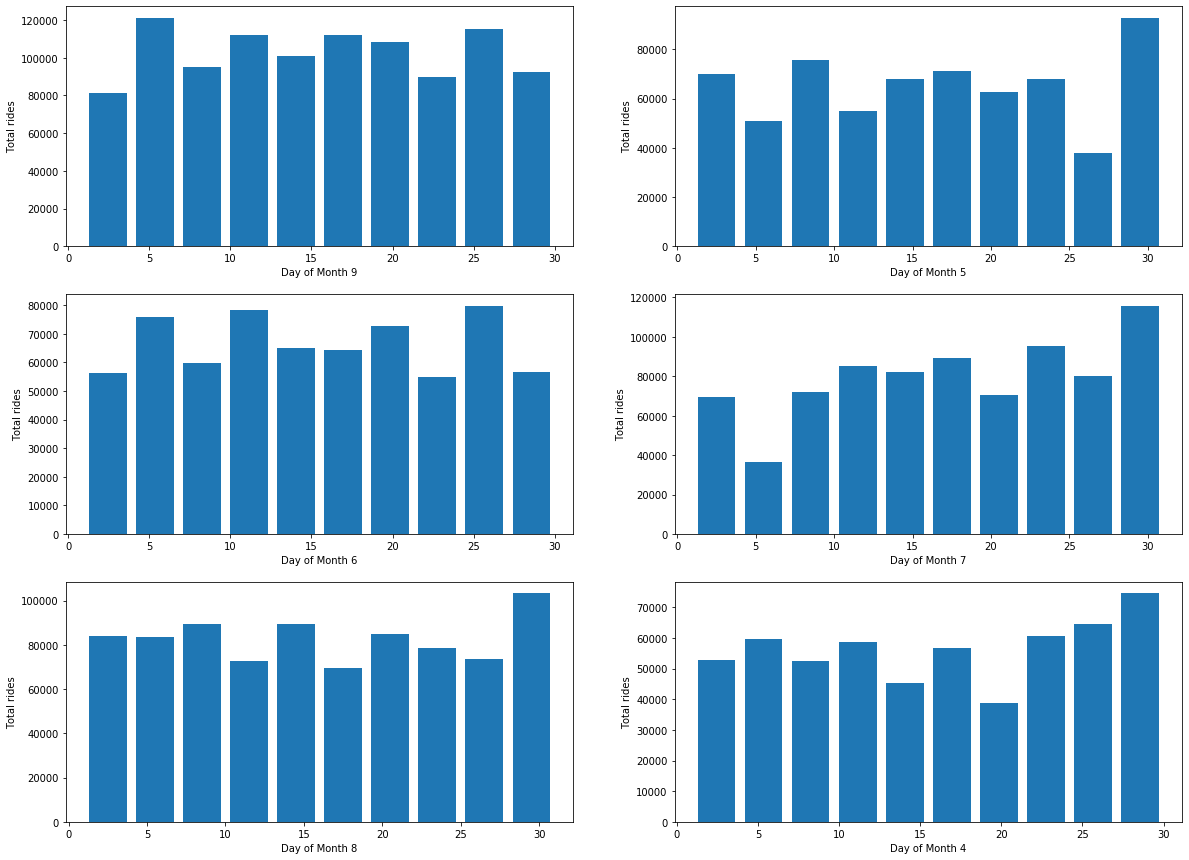

In [71]:
# rides in month per day
plt.figure(figsize=(20,15))

for i,month in enumerate(df["Month"].unique()):
    plt.subplot(3,2,i+1)
    df_out=df[df["Month"]==month]
    plt.hist(df_out["Day"],rwidth=0.8)
    plt.xlabel("Day of Month {}".format(month))
    plt.ylabel("Total rides")

Text(0.5, 1.0, 'Hours of Day VS Latidute of Passengers')

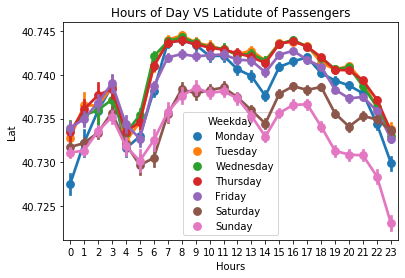

In [74]:
ax=sns.pointplot(x="Hours",y="Lat",data=df,hue="Weekday")
ax.set_title("Hours of Day VS Latidute of Passengers")